# Evaliating number of 1-dimensional diistribution modes with clustering

### Resume: "K-means" works, with evaluation of optimal number of clusters based on either of the two:

- Maximizing "Silhouette Coefficient" (SC), which appears more human-intuitive but does not work for K=1
  - https://en.wikipedia.org/wiki/Silhouette_(clustering) 
  - https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c
- Minimizing "Normalized Centroid Distance" (NCD) - based on "minimum description length" idea, works for K=1, does not align with human "reductionist" intuition for diverse distributions (tends to create more clusters than needed)
  - https://www.researchgate.net/publication/221020638_Cluster_Validity_Measures_Based_on_the_Minimum_Description_Length_Principle
- Minimizing "Normalized Centroid Distance times Centroids" (NCDC) - extends NCD multiplying it by number of clusters to penalize creation of too many clusters, works for K=1, more human-intuitive than NCD but less human-intuitive than SC 
- Using SC+ (maximize SC if it is above threshold 0.65 or minimize NCDC otherwise) - seems generally optimal from human intuition perspective 

### Note:
- https://pypi.org/project/diptest/ - normal vs. multi-modal distributions only, no assessment for number of modes ("K means") 


In [1]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

import math
import pandas as pd
import numpy as np
import random

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']

from pygents.util import dictcount
from pygents.plot import subplots_hist


### Experiment with DBSCAN and Silhouette

In [2]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

centers = [[1, 1], [-1, -1], [1, -1]]

X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(len(X),len(labels))
print(X)
print(labels)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
750 750
[[ 0.49426097  1.45106697]
 [-1.42808099 -0.83706377]
 [ 0.33855918  1.03875871]
 ...
 [-0.05713876 -0.90926105]
 [-1.16939407  0.03959692]
 [ 0.26322951 -0.92649949]]
[ 0  1  0  2  0  1  1  2  0  0  1  1  1  2  1  0 -1  1  1  2  2  2  2  2
  1  1  2  0  0  2  0  1  1  0  1  0  2  0  0  2  2  1  1  1  1  1  0  2
  0  1  2  2  1  1  2  2  1  0  2  1  2  2  2  2  2  0  2  2  0  0  0  2
  0  0  2  1 -1  1  0  2  1  1  0  0  0  0  1  2  1  2  2  0  1  0  1 -1
  1  1  0  0  2  1  2  0  2  2  2  2 -1  0 -1  1  1  1  1  0  0  1  0  1
  2  1  0  0  1  2  1  0  0  2  0  2  2  2  0 -1  2  2  0  1  0  2  0  0
  2  2 -1  2  1 -1  2  1  1  2  2  2  0  1  0  1  0  1  0  2  2 -1  1  2
  2  1  0  1  2  2  2  1  1  2  2  0  1  2  0  0  2  0  0  1  0  1  0  1
  1  2  2  0  0  1  1  2  1  2  2  2  2  0  2  0  2  

### Experiment with K-means

In [3]:
X = np.array([[1, 2], [1, 4], [1, 0],
             [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
#array([1, 1, 1, 0, 0, 0], dtype=int32)
kmeans.predict([[0, 0], [12, 3]])
#array([1, 0], dtype=int32)
kmeans.cluster_centers_
#array([[10.,  2.],
#       [ 1.,  2.]])


array([[10.,  2.],
       [ 1.,  2.]])

In [4]:
X = np.array([[1], [3], [2],
             [11], [13], [12]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
#array([1, 1, 1, 0, 0, 0], dtype=int32)
kmeans.predict([[0], [10]])
#array([1, 0], dtype=int32)
kmeans.cluster_centers_


array([[12.],
       [ 2.]])

### Experiments with K-means 


In [5]:
x = [7,12,11,101,98,101] # => 10, 100
print(np.mean(x))

def find_modes(data):
    print(data)
    sorted_data = sorted(data)
    print(sorted_data)
    agg_data = {}
    for val in data:
        dictcount(agg_data,val)
    print(agg_data)
            
print(find_modes(x))


55.0
[7, 12, 11, 101, 98, 101]
[7, 11, 12, 98, 101, 101]
{7: 1, 12: 1, 11: 1, 101: 2, 98: 1}
None


In [6]:
X = np.array([[xi] for xi in x])
print(X)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_
print(kmeans.labels_)
kmeans.predict([[0], [10]])
#array([1, 0], dtype=int32)
print(kmeans.cluster_centers_)

print(metrics.silhouette_score(X, labels))


[[  7]
 [ 12]
 [ 11]
 [101]
 [ 98]
 [101]]
[1 1 1 0 0 0]
[[100.]
 [ 10.]]
0.9703956940727511


### Design evaluation functions 

In [7]:
def centrod_distance_norm(x,labels,centroids):
    #TODO get rid of sum_0 which can be negative!!!
    mean = np.sum(x) / len(x) # mean of value distribution
    sum_m = 0
    sum_d = 0
    for i in range(len(x)): # sum of value distances from meean and centroids
        sum_m += abs(x[i] - mean)
        sum_d += abs(x[i] - centroids[labels[i]][0])
    for c in centroids: # sum of centroid distances from the distribution mean
        sum_d += abs(c[0] - mean)
    return 0 if sum_m == 0 else sum_d / sum_m # "shortest description" denominated by "mean-based description"

def centrod_distance_norm_centroids(x,labels,centroids):
    return len(centroids) * centrod_distance_norm(x,labels,centroids)

def cluster_Kmeans_optimal(x, Kmax = 10, random_state = 0, silhouette_threshold = 0.65, debug = False):
    """
    Uses Silhouette if above threshold, mean norm centroid distance otherwise  
    """
    X = np.array([[xi] for xi in x])
    K = min(Kmax,len(X))+1
    res = []
    for k in range(1,K):
        if k > 1:
            kmeans = KMeans(n_clusters=k, random_state=random_state).fit(X)
            labels = kmeans.labels_
            centers = kmeans.cluster_centers_
        else:
            labels = [0 for xi in x]
            centers = [[np.mean(x)]]
        si = metrics.silhouette_score(X, labels) if len(centers) > 1 and len(set(labels)) > 1 else 0.0 
        d = centrod_distance_norm_centroids(x, labels, centers)
        res.append((k,d,si,labels,centers))
        if debug:
            print(k,d,si)#,str([c[0] for c in centers]))
    # first, find best by Silhouette 
    Dmin = None
    margin = None
    Kopt = None
    labels_opt = None
    centers_opt = None
    silhouette_opt = None
    for r in res:
        if r[2] >= silhouette_threshold:
            if silhouette_opt is None or silhouette_opt < r[2]:
                if not silhouette_opt is None:
                    margin = (r[2] - silhouette_opt)/r[2] # update diff between winner and successor 
                Kopt = r[0]
                Dmin = r[1]
                silhouette_opt = r[2]
                labels_opt = r[3]
                centers_opt = r[4]
    if Kopt is None:
        for r in res:
            if Dmin is None or Dmin > r[1]:
                if not Dmin is None:
                    margin = (Dmin - r[1])/r[1] # update diff between winner and successor 
                Kopt = r[0]
                Dmin = r[1]
                silhouette_opt = r[2]
                labels_opt = r[3]
                centers_opt = r[4]
    return Kopt, Dmin, margin, silhouette_opt, labels_opt, [c[0] for c in centers_opt]


def cluster_Kmeans_min_distance(x, Kmax = 10, random_state = 0, count_centroids = True, debug = False, profile = None):
    """
    Uses mean norm centroid distance only   
    """
    X = np.array([[xi] for xi in x])
    K = min(Kmax,len(X))+1
    Dmin = None
    Deval = None
    Kopt = None
    labels_opt = None
    centers_opt = None
    silhouette_opt = None
    for k in range(1,K):
        if k > 1:
            kmeans = KMeans(n_clusters=k, random_state=random_state).fit(X)
            labels = kmeans.labels_
            centers = kmeans.cluster_centers_
        else:
            labels = [0 for xi in x]
            centers = [[np.mean(x)]]
        si = metrics.silhouette_score(X, labels) if len(centers) > 1 and len(set(labels)) > 1 else 0.0 
        ncd = centrod_distance_norm(x, labels, centers)
        ncdc = centrod_distance_norm_centroids(x, labels, centers)
        #sincdc = (si + ncdc) / 2
        d = ncdc if count_centroids else ncd
        if not profile is None:
            profile.append((k,si,ncd,ncdc))
        if debug:
            print(k,d,si)#,str([c[0] for c in centers]))
        if Dmin is None or Dmin > d:
            if not Dmin is None:
                Deval = (Dmin - d)/d # update diff between winner and successor 
            Dmin = d
            Kopt = k
            labels_opt = labels
            centers_opt = centers
            silhouette_opt = si
    return Kopt, Dmin, Deval, silhouette_opt, labels_opt, [c[0] for c in centers_opt]


def cluster_Kmeans_max_silhouette_proximity(x, Kmax = 10, random_state = 0, debug = False):
    """
    Uses Silhouette blended with mean norm centroid distance in unusable way   
    """
    if debug:
        print()
    X = np.array([[xi] for xi in x])
    K = min(Kmax,len(X))+1
    SIPmax = None
    exceed = None
    Kopt = None
    labels_opt = None
    centers_opt = None
    silhouette_opt = None
    distance_opt = None
    for k in range(1,K):
        if k > 1:
            kmeans = KMeans(n_clusters=k, random_state=random_state).fit(X)
            labels = kmeans.labels_
            centers = kmeans.cluster_centers_
        else:
            labels = [0 for xi in x]
            centers = [[np.mean(x)]]
        si = metrics.silhouette_score(X, labels) if len(centers) > 1 and len(set(labels)) > 1 else 0.0 
        d = centrod_distance_norm(x, labels, centers)
        sip = si * (1-d)
        if debug:
            print(k,d,si)#,sip)#,str([c[0] for c in centers]))
        if SIPmax is None or SIPmax < sip:
            if not SIPmax is None:
                exceed = (sip - SIPmax)/sip # update diff between winner and successor 
            SIPmax = sip
            Kopt = k
            labels_opt = labels
            centers_opt = centers
            silhouette_opt = si
            distance_opt = d
    return Kopt, SIPmax, exceed, silhouette_opt, labels_opt, [c[0] for c in centers_opt]


x = [7,12,11,101,98,101] # => 10, 100

for rs in [0,1,2,10]:
    print(cluster_Kmeans_optimal(x,random_state=rs,debug=False))

for rs in [0,1,2,10]:
    print(cluster_Kmeans_min_distance(x,random_state=rs,debug=False))

for rs in [0,1,2,10]:
    print(cluster_Kmeans_max_silhouette_proximity(x,random_state=rs,debug=False))


(2, 0.7407407407407407, None, 0.9703956940727511, array([1, 1, 1, 0, 0, 0], dtype=int32), [100.0, 10.0])
(2, 0.7407407407407407, None, 0.9703956940727511, array([0, 0, 0, 1, 1, 1], dtype=int32), [10.0, 100.0])
(2, 0.7407407407407407, None, 0.9703956940727511, array([0, 0, 0, 1, 1, 1], dtype=int32), [10.0, 100.0])
(2, 0.7407407407407407, None, 0.9703956940727511, array([1, 1, 1, 0, 0, 0], dtype=int32), [100.0, 10.0])
(2, 0.7407407407407407, 0.3500000000000001, 0.9703956940727511, array([1, 1, 1, 0, 0, 0], dtype=int32), [100.0, 10.0])
(2, 0.7407407407407407, 0.3500000000000001, 0.9703956940727511, array([0, 0, 0, 1, 1, 1], dtype=int32), [10.0, 100.0])
(2, 0.7407407407407407, 0.3500000000000001, 0.9703956940727511, array([0, 0, 0, 1, 1, 1], dtype=int32), [10.0, 100.0])
(2, 0.7407407407407407, 0.3500000000000001, 0.9703956940727511, array([1, 1, 1, 0, 0, 0], dtype=int32), [100.0, 10.0])
(2, 0.6109898814532136, 1.0, 0.9703956940727511, array([1, 1, 1, 0, 0, 0], dtype=int32), [100.0, 10.0])


/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Pos

### Define generation of distributions based on three "centriod" values on single axis X with different distributions based on std 

In [8]:
centers = [[1], [4], [5]]

def make_scaled_blobs(n_samples=100, centers=centers, cluster_std=0.4, random_state=0):
    X, labels_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)
    #return StandardScaler().fit_transform(X)
    return X


### Experiment with diptest, see that "normality" starts with pval=0.5

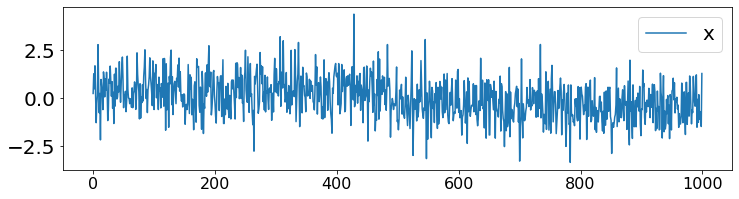

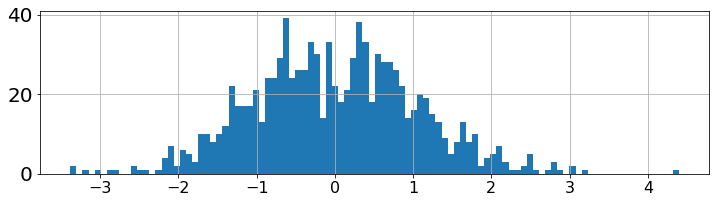

0.014226908149879917 0.19396660722402592


In [9]:
# https://pypi.org/project/diptest/
import diptest

# generate some bimodal random draws
N = 1000
hN = N // 2
x = np.empty(N, dtype=np.float64)
x[:hN] = np.random.normal(0.4, 1.0, hN)
x[hN:] = np.random.normal(-0.4, 1.0, hN)

df = pd.DataFrame(x,columns=['x'])
plt.rc('legend',fontsize=20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=20)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = (12,3);
df.plot()
plt.show()

df['x'].hist(bins=100)
plt.show()

dip, pval = diptest.diptest(x)
print(dip,pval)

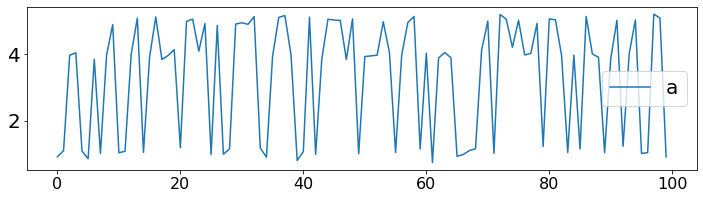

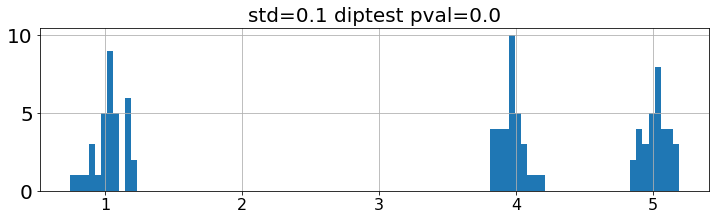

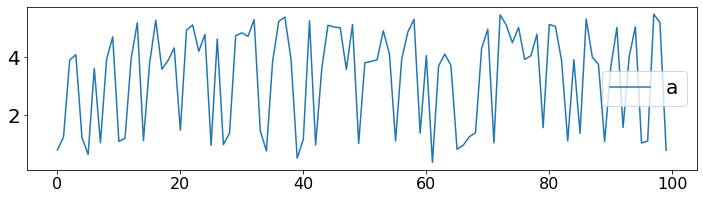

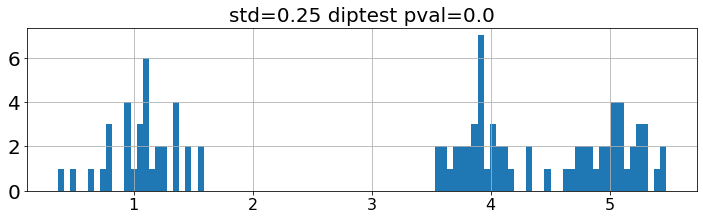

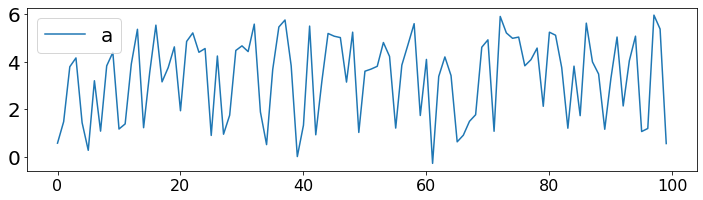

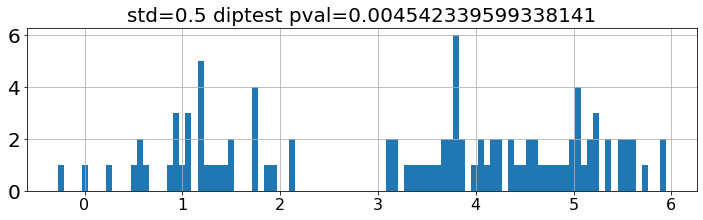

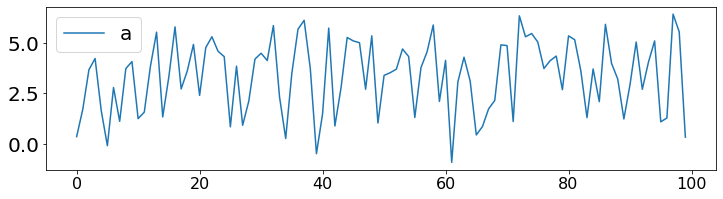

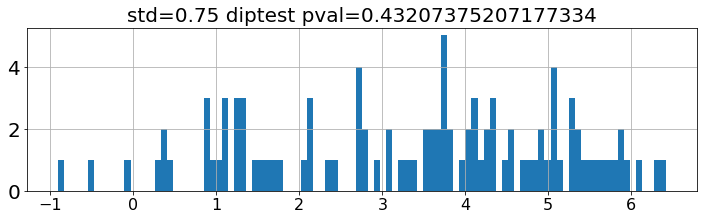

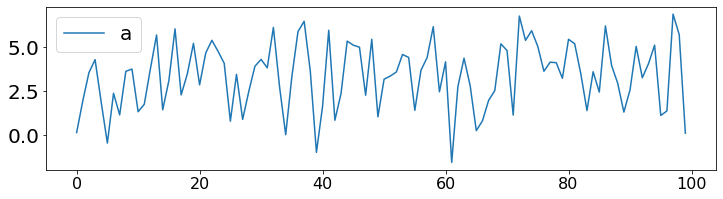

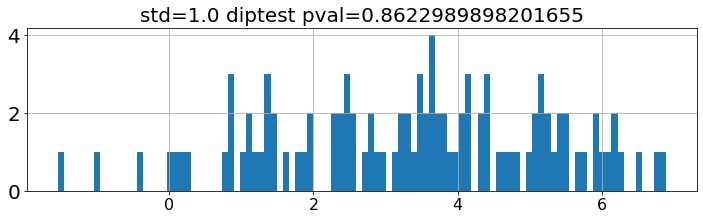

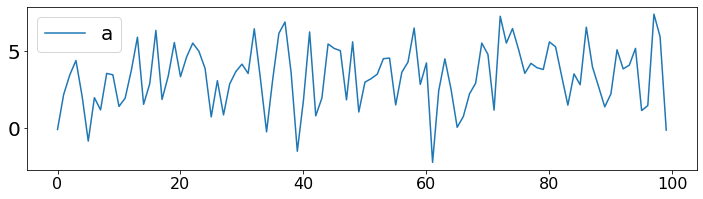

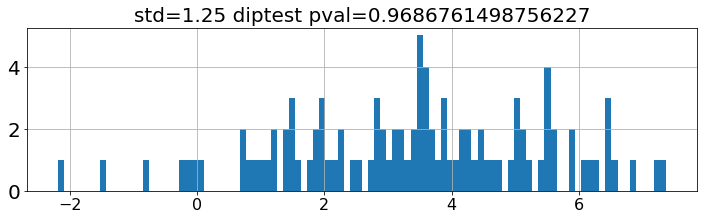

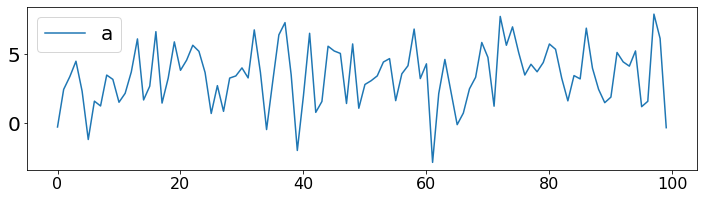

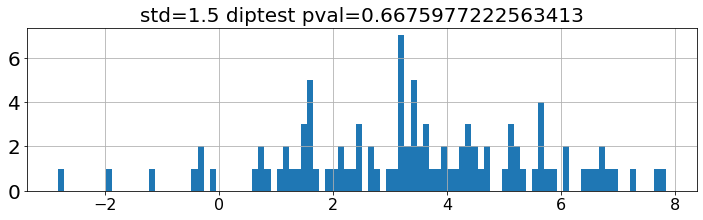

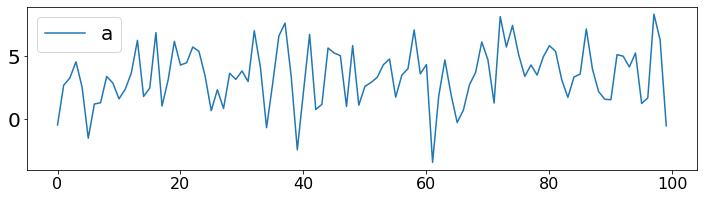

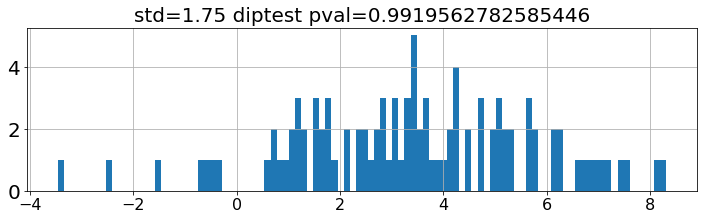

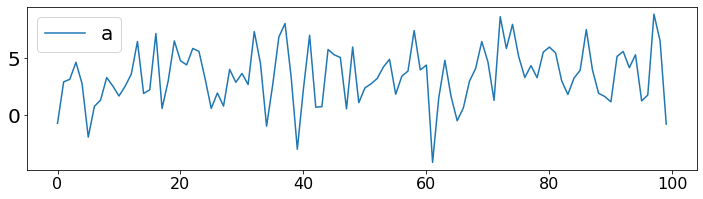

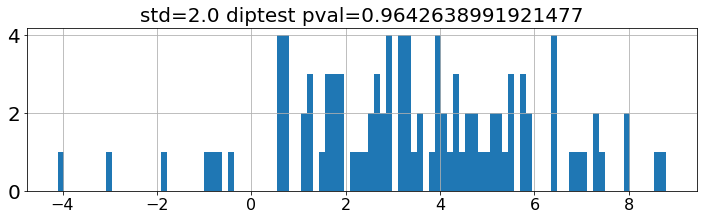

In [10]:

for std in [0.1,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0]:
    a = make_scaled_blobs(cluster_std=std)

    df = pd.DataFrame(a,columns=['a'])
    plt.rc('legend',fontsize=20)
    plt.rc('xtick', labelsize=16) 
    plt.rc('ytick', labelsize=20)
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams["figure.figsize"] = (12,3);
    df.plot()
    plt.show()

    aa = np.array([aa[0] for aa in a])
    dip, pval = diptest.diptest(aa)
    #print(dip,pval)
    df = pd.DataFrame(aa,columns=['a'])
    df.hist(bins=100)
    plt.title('std='+str(std)+' diptest pval='+str(pval))
    plt.show()


### Explore counting centroids for SC/NCD/NCDC

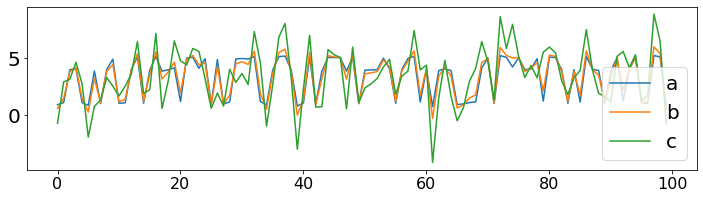

1 1.0 0.0
2 0.5307589999822371 0.8728625326006106
3 0.2329989405588907 0.9206532862141611
4 0.3126052227150767 0.797216694634447
5 0.4330771762789137 0.6467976794819186
6 0.5810194578734654 0.6731830456747382
7 0.709576501628501 0.5661132145236614
8 0.9199290921939667 0.5370732219983253
9 1.0948519571787056 0.5561554759313264
10 1.2155188490241693 0.5614548025768571
3 0.2329989405588907 0.9206532862141611

1 1.0 0.0
2 0.26537949999111854 0.8728625326006106
3 0.07766631351963023 0.9206532862141611
4 0.07815130567876917 0.797216694634447
5 0.08661543525578273 0.6467976794819186
6 0.09683657631224424 0.6731830456747382
7 0.10136807166121443 0.5661132145236614
8 0.11499113652424583 0.5370732219983253
9 0.12165021746430062 0.5561554759313264
10 0.12155188490241693 0.5614548025768571
3 0.07766631351963023 0.9206532862141611


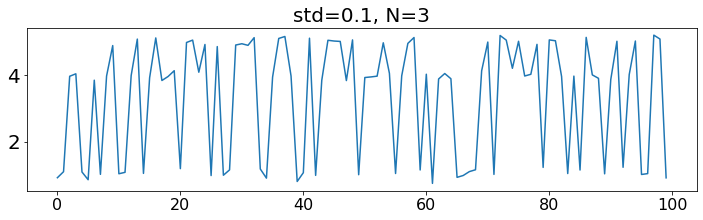

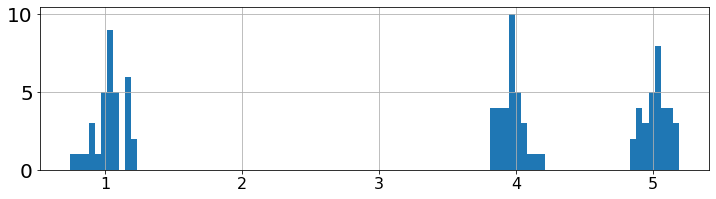

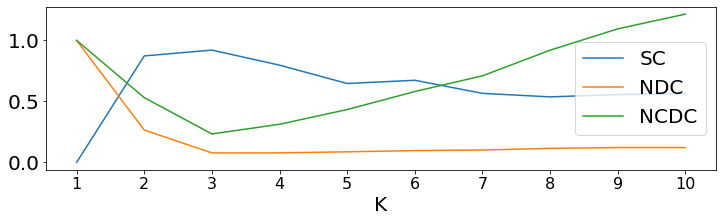

1 1.0 0.0
2 0.8336607838117776 0.738529941327117
3 0.7870268055755861 0.672839267598818
4 0.9423279736787674 0.6228908684891789
5 1.1393914834170054 0.5691538547496514
6 1.3053925784526172 0.5563029405388562
7 1.3911388926036612 0.5658331758457519
8 1.4249215387718002 0.579778540467124
9 1.560620476040955 0.5948303440951981
10 1.8525712794628777 0.5814340485564405
3 0.7870268055755861 0.672839267598818

1 1.0 0.0
2 0.4168303919058888 0.738529941327117
3 0.2623422685251954 0.672839267598818
4 0.23558199341969185 0.6228908684891789
5 0.22787829668340107 0.5691538547496514
6 0.21756542974210288 0.5563029405388562
7 0.19873412751480873 0.5658331758457519
8 0.17811519234647502 0.579778540467124
9 0.17340227511566167 0.5948303440951981
10 0.18525712794628776 0.5814340485564405
9 0.17340227511566167 0.5948303440951981


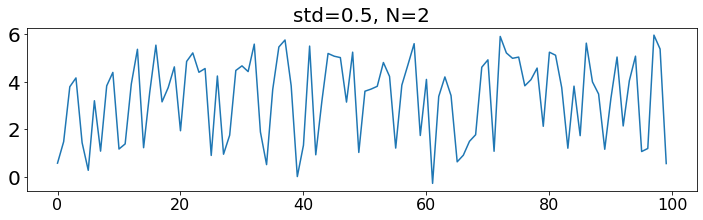

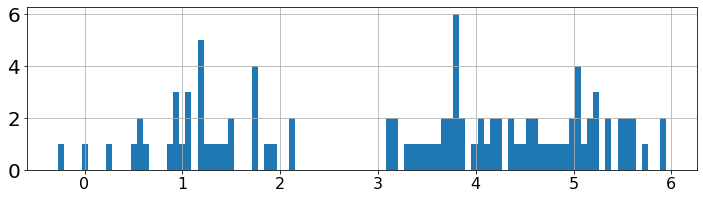

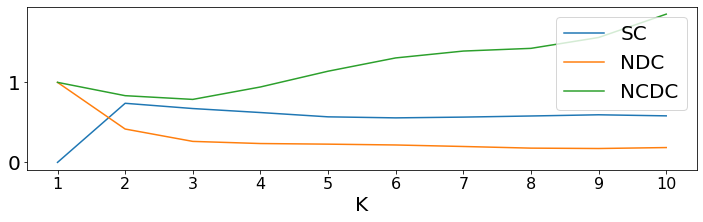

1 1.0 0.0
2 1.2332246475886195 0.5521141881052705
3 1.4688011271575072 0.5174196075201983
4 1.662868141172529 0.5169054829095378
5 1.8217029168716414 0.5232063962143017
6 1.9526931297394454 0.5119345071482294
7 2.1628010984772006 0.566368856013428
8 2.2114229280429023 0.5601817857260716
9 2.556948869504148 0.5782992978722826
10 3.083908513849987 0.5722393452154223
1 1.0 0.0

1 1.0 0.0
2 0.6166123237943097 0.5521141881052705
3 0.48960037571916903 0.5174196075201983
4 0.41571703529313225 0.5169054829095378
5 0.3643405833743283 0.5232063962143017
6 0.3254488549565742 0.5119345071482294
7 0.3089715854967429 0.566368856013428
8 0.2764278660053628 0.5601817857260716
9 0.28410542994490534 0.5782992978722826
10 0.3083908513849987 0.5722393452154223
8 0.2764278660053628 0.5601817857260716


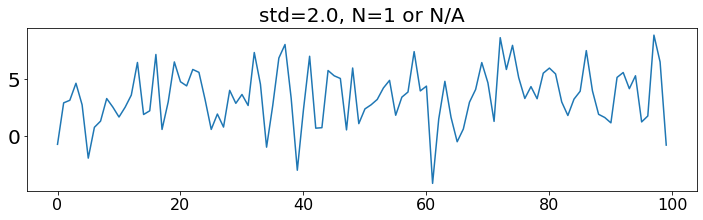

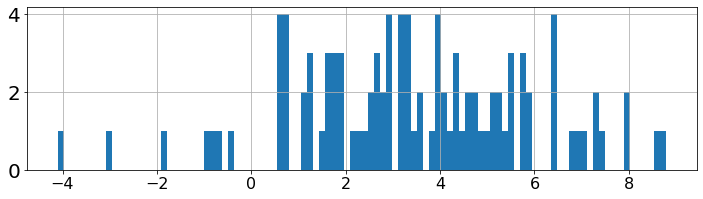

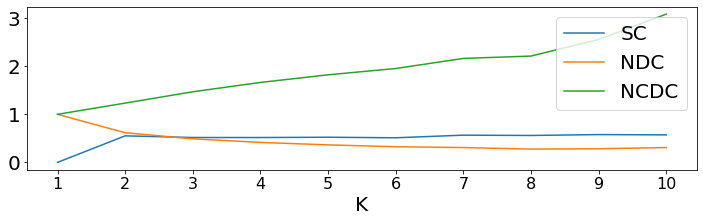

In [11]:

t = {}
a = make_scaled_blobs(cluster_std=0.1); t['a'] = 'std=0.1, N=3'
b = make_scaled_blobs(cluster_std=0.5); t['b'] = 'std=0.5, N=2'
c = make_scaled_blobs(cluster_std=2.0); t['c'] = 'std=2.0, N=1 or N/A'

df = pd.DataFrame(a,columns=['a'])
df['b']=b
df['c']=c
plt.rc('legend',fontsize=20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=20)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = (12,3);
df.plot()
plt.show()

for case in ['a','b','c']:

    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[case],Kmax=10,debug=True)
    print(k,d,si)

    print()

    profile = []
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[case],Kmax=10,count_centroids=False,debug=True,profile=profile)
    print(k,d,si)

    df[case].plot()
    plt.title(t[case])
    plt.show()
    df[case].hist(bins=100)
    plt.show()
    pdf = pd.DataFrame(profile,columns=['K','SC','NDC','NCDC'])
    pdf.set_index('K',inplace=True)
    pdf.plot()
    plt.xticks(np.arange(1, 11, 1.0))
    plt.show()


### Test random distributions

A 1 None 0.0
B 3 0.0019618590482290443 0.6036971648111367
C 2 0.2410850855395025 0.7115681184323225
D 2 3.9495689577128794 0.9335968233980341

A 10 0.06962165734693677 0.5472927493225955
B 10 0.10514614889175952 0.5605539588995337
C 10 0.09085008046836382 0.5719593964135757
D 10 0.04664960774089167 0.5625455111303523

A 1 None 0.0
B 3 0.0019618590482290443 0.6036971648111367
C 2 None 0.7115681184323225
D 2 None 0.9335968233980341


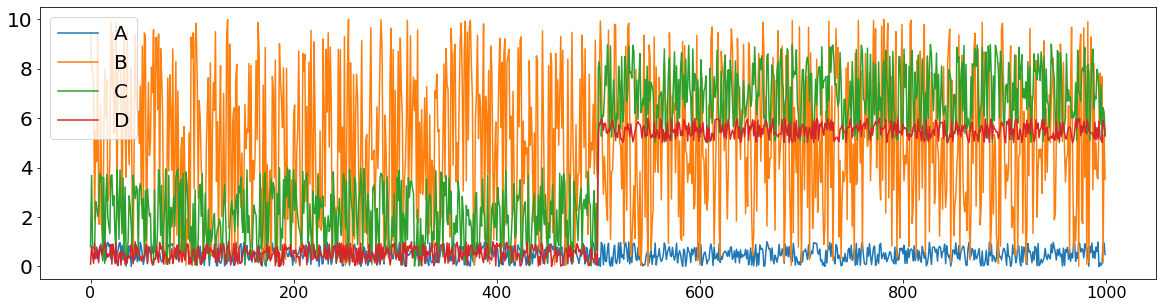

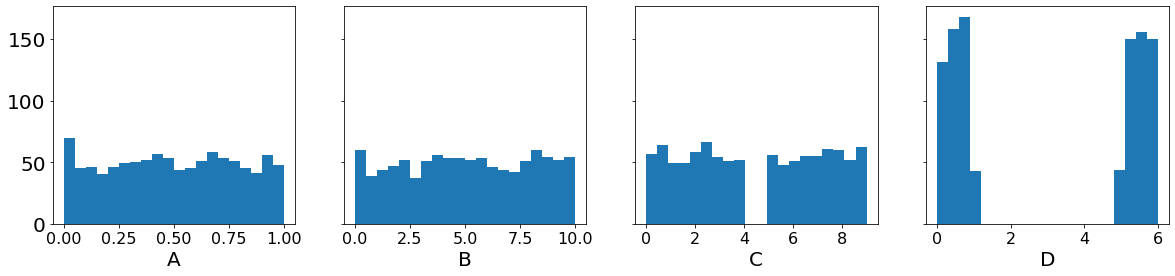

In [12]:
random.seed(0)

x1 = [random.random() for x in range(1000)] 
x10 = [random.random()*10 for x in range(1000)]
df = pd.DataFrame({'A':x1,'B':x10})
df['C'] = [random.random()*4 for x in range(500)] + [random.random()*4+5 for x in range(500,1000)]
df['D'] = [random.random() for x in range(500)] + [random.random()+5 for x in range(500,1000)]
plt.rcParams["figure.figsize"] = (20,5);
df.plot()
subplots_hist(df,df.columns,bins=20)

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,debug=False)
    print(c,k,e,si)

print()

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,count_centroids=False,debug=False)
    print(c,k,e,si)

print()

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_optimal(df[c],Kmax=10,debug=False)
    print(c,k,e,si)


In [13]:
k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df['B'],Kmax=10,debug=True)
print(c,k,e,si)


1 1.0 0.0
2 1.0354245883573423 0.6152950374196976
3 0.9980419823064995 0.6036971648111367
4 1.030559378846997 0.5740998796913618
5 1.0544218144458493 0.5563680975800274
6 1.0684717511396178 0.5494311775980393
7 1.0303384632098562 0.5641037369766945
8 1.0637092736568192 0.5574317076073974
9 1.0684596327423463 0.5610617859220627
10 1.0742265816192895 0.5605539588995337
D 3 0.0019618590482290443 0.6036971648111367


### Test normal distributions

I 1 None 0.0
J 1 None 0.0
K 3 0.059253354403965966 0.672839267598818
L 3 1.2779459799650343 0.9206532862141611

I 8 0.11772951823441986 0.5601817857260716
J 8 0.013206640053075858 0.550209189949916
K 9 0.027179096858272314 0.5948303440951981
L 3 2.416918969947552 0.9206532862141611

I 1 None 0.0
J 1 None 0.0
K 2 None 0.738529941327117
L 3 0.051909610631024714 0.9206532862141611


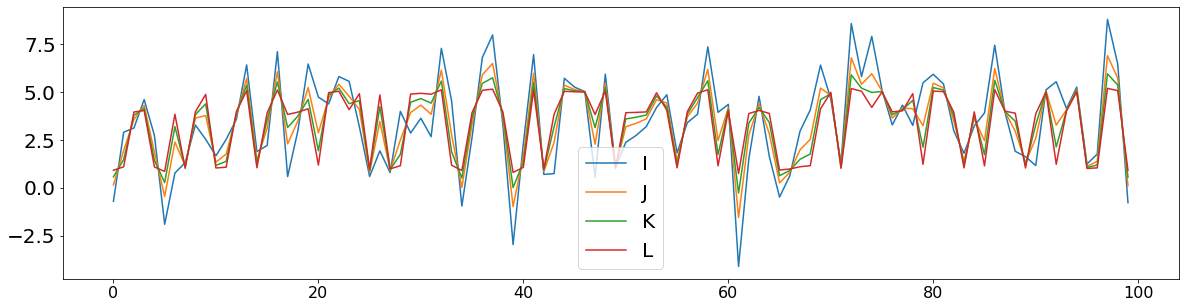

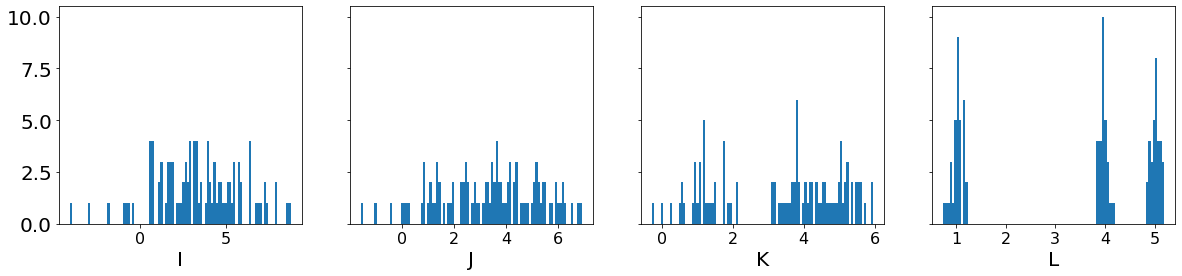

In [14]:
centers = [[1], [4], [5]]

def make_scaled_blobs(n_samples=100, centers=centers, cluster_std=0.4, random_state=0):
    X, labels_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)
    #return StandardScaler().fit_transform(X)
    return X

x20 = make_scaled_blobs(cluster_std=2.0)
x10 = make_scaled_blobs(cluster_std=1.0)
x05 = make_scaled_blobs(cluster_std=0.5)
x01 = make_scaled_blobs(cluster_std=0.1)

df = pd.DataFrame(x20,columns=['I'])
df['J']=x10
df['K']=x05
df['L']=x01
df
plt.rcParams["figure.figsize"] = (20,5);
df.plot()
subplots_hist(df,df.columns,bins=100)

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,debug=False)
    print(c,k,e,si)

print()

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,count_centroids=False,debug=False)
    print(c,k,e,si)

print()

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_optimal(df[c],Kmax=10,debug=False)
    print(c,k,e,si)


In [15]:
k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df['K'],Kmax=10,debug=True)


1 1.0 0.0
2 0.8336607838117776 0.738529941327117
3 0.7870268055755861 0.672839267598818
4 0.9423279736787674 0.6228908684891789
5 1.1393914834170054 0.5691538547496514
6 1.3053925784526172 0.5563029405388562
7 1.3911388926036612 0.5658331758457519
8 1.4249215387718002 0.579778540467124
9 1.560620476040955 0.5948303440951981
10 1.8525712794628777 0.5814340485564405


M 1 None 0.0 [3.2404865850196094]
N 2 0.027622323372905485 0.6542221926667482 [4.561845774913374, 1.0656745902460614]
O 2 0.4676036204620897 0.7730769923238598 [4.478341496497414, 1.0271030002068202]
P 3 1.9476910932831932 0.9139103926944715 [4.9994275798910675, 1.0006094701675234, 3.986370516850757]

M 10 0.0964245722835182 0.5233721023330599 [2.407896842951306, 7.035836844508598, -0.814557035606188, 5.590846607412739, 4.454186464425779, 1.4830972675715652, -2.3029849459442397, 9.005171111857692, 0.41288667042877414, 3.359021382357193]
N 10 0.06710134753643782 0.5269286473819188 [3.5247157416932375, 0.7085824808439973, 5.263101373618115, -0.3025682117636803, 1.6736006487346642, 7.028176589805885, 4.697395678735865, 2.7204580475135165, 4.145107223816791, 6.0035338026767295]
O 10 0.08997636550101071 0.5229892082786335 [4.3718575435050715, 0.8316834787956515, 5.290122142654184, 3.26020042255377, 1.9201511949280516, 3.8795409377189936, 1.3249845279765602, 4.8334867788459155, 5.86414581960

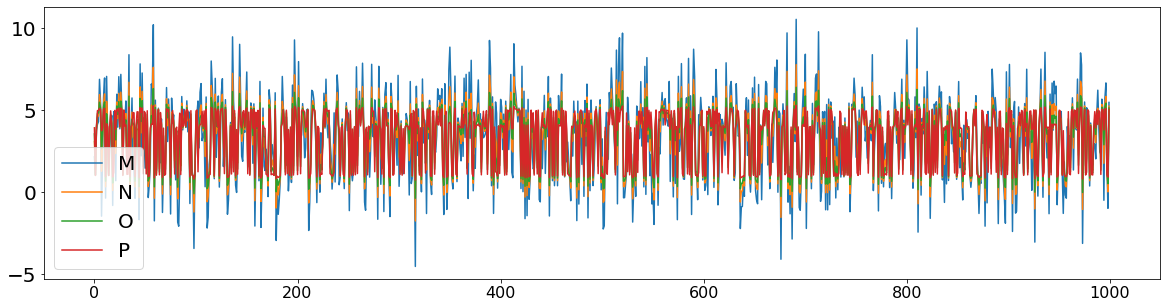

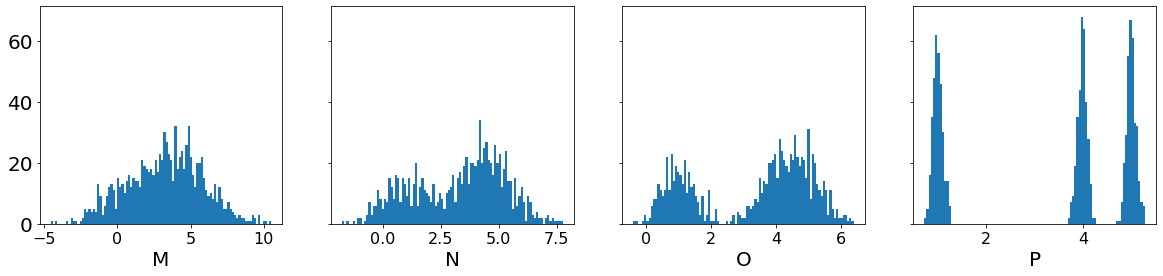

In [16]:
centers = [[1], [4], [5]]

def make_scaled_blobs(n_samples=1000, centers=centers, cluster_std=0.4, random_state=0):
    X, labels_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)
    #return StandardScaler().fit_transform(X)
    return X

x20 = make_scaled_blobs(cluster_std=2.0)
x10 = make_scaled_blobs(cluster_std=1.0)
x05 = make_scaled_blobs(cluster_std=0.5)
x01 = make_scaled_blobs(cluster_std=0.1)

df = pd.DataFrame(x20,columns=['M'])
df['N']=x10
df['O']=x05
df['P']=x01
df
plt.rcParams["figure.figsize"] = (20,5);
df.plot()
subplots_hist(df,df.columns,bins=100)

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,debug=False)
    print(c,k,e,si,cs)

print()

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,count_centroids=False,debug=False)
    print(c,k,e,si,cs)

print()

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_optimal(df[c],Kmax=10,debug=False)
    print(c,k,e,si,cs)



In [17]:
k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df['M'],Kmax=10,debug=True)
print(c,k,e,si,cs)


1 1.0 0.0
2 1.181512077213249 0.5670480740632302
3 1.2639790745766832 0.5381174860843299
4 1.3393847542003894 0.533556940832752
5 1.3638777108907543 0.5345372910334315
6 1.424363179690797 0.5331324572182861
7 1.5012795555481238 0.5171951452288559
8 1.5717795868353006 0.5151764075519993
9 1.5477520657685078 0.5277320485116236
10 1.568484108249145 0.5233721023330599
P 1 None 0.0 [3.2404865850196094]


### Test weird distribtions

/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Pos

Q 1 None 0.0 [1.0]
R 3 0.03145012488780241 0.6502108302906244 [-0.7776853854153747, 0.8237914530947342, 0.06865463814330774]
S 3 0.01919824086041621 0.6293129652144198 [-0.7337096580581443, 0.09649667040452593, 0.8104353413885883]
T 1 None 0.0 [0.4554865083873183]



/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (7). Pos

Q 1 None 0.0 [1.0]
R 9 0.00024166232259400348 0.5839563586341946 [-0.5156233362169421, 0.7013617721316303, 0.05980617963821155, -0.9618598733887121, 0.4671754029747786, 0.9302884759899459, -0.7718572702889532, -0.2179545697524497, 0.2603364425030366]
S 10 0.007854208299609883 0.5612588976094138 [-0.7622363368177655, 0.5796807824492439, -0.03639879655989195, 0.9591432010268699, 0.3618643388851013, -0.5269006755435859, -0.9506635450987653, 0.7933434675974638, 0.1697357019076694, -0.28179319173794526]
T 10 0.03756863931470544 0.4935454010462237 [0.5309206442154809, 0.18879594820159828, 0.7168540462400276, 0.35680207086765214, 0.029989501452393208, 0.8010589238165617, 0.6245250480052362, 0.10477965906769626, 0.27147566137954704, 0.4438001388141603]



/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Pos

Q 1 None 0.0 [1.0]
R 2 None 0.6747366131476279 [-0.6309807647374132, 0.6385646572863999]
S 2 None 0.6567559382923658 [-0.5316139413045201, 0.6651992557906675]
T 1 None 0.0 [0.4554865083873183]


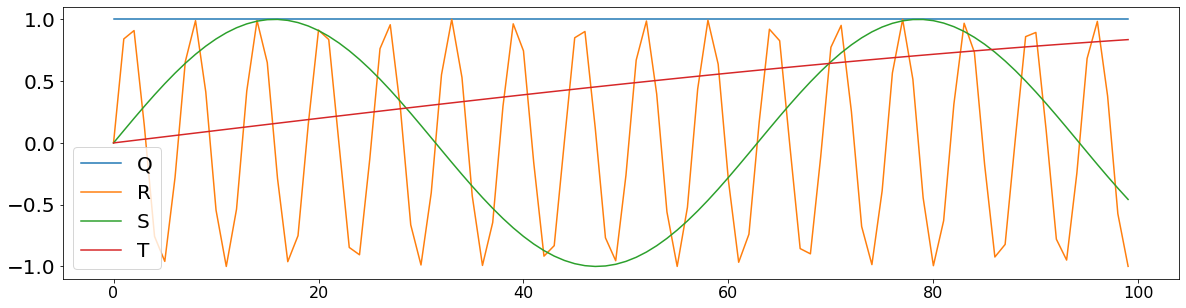

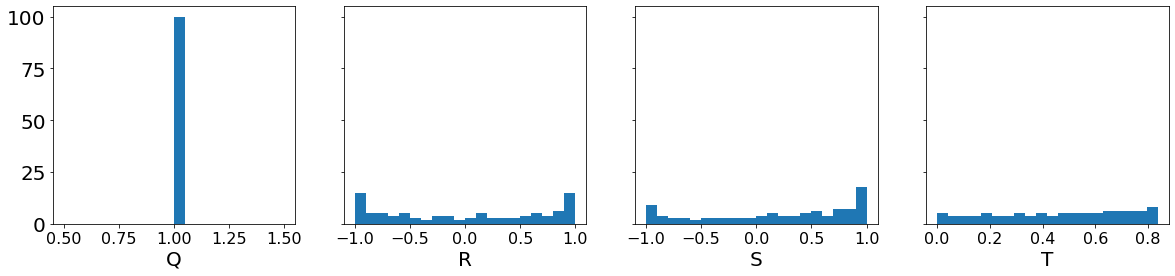

In [18]:
sinc = [1 for x in range(0,100)]
sin1 = [math.sin(x*1.0) for x in range(0,100)]
sin01 = [math.sin(x*0.1) for x in range(0,100)]
sin001 = [math.sin(x*0.01) for x in range(0,100)]
#sin001_2 = [-x*x if x < 0 else x*x for x in sin001]
#df = pd.DataFrame({'sinc':sinc,'sin1':sin1,'sin01':sin01,'sin001':sin001,'sin001_2':sin001_2})
df = pd.DataFrame({'Q':sinc,'R':sin1,'S':sin01,'T':sin001})
df.plot()
subplots_hist(df,df.columns,bins=20)

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,debug=False)
    print(c,k,e,si,cs)

print()

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,count_centroids=False,debug=False)
    print(c,k,e,si,cs)

print()
for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_optimal(df[c],Kmax=10,debug=False)
    print(c,k,e,si,cs)


In [19]:
k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df['T'],Kmax=10,debug=True)
print(c,k,e,si)


1 1.0 0.0
2 1.0201632422952833 0.629082931821857
3 1.0544930290717751 0.5854223031061788
4 1.1337795676512687 0.5614179641231478
5 1.2095852299645666 0.5432733921295689
6 1.3524012397861522 0.529136043244519
7 1.4778287586825984 0.5155087796625364
8 1.6575476618780383 0.5063610352148696
9 1.868515501005183 0.49910768818054474
10 1.9969132632189246 0.4935454010462237
T 1 None 0.0


U 3 0.011230906432940847 0.6459557228836943
W 2 1.7610015849514375 0.8808016162911058
X 1 None 0.0
Y 1 None 0.0

U 8 0.028657587205026248 0.562736983594453
W 8 0.04728513879184231 0.6343485953850633
X 9 0.039422417873727106 0.5820453716044222
Y 10 0.004013344167312377 0.5800219127234371

U 2 None 0.6779846666876689
W 2 None 0.8808016162911058
X 3 None 0.6533016770212215
Y 3 None 0.6863572519371363


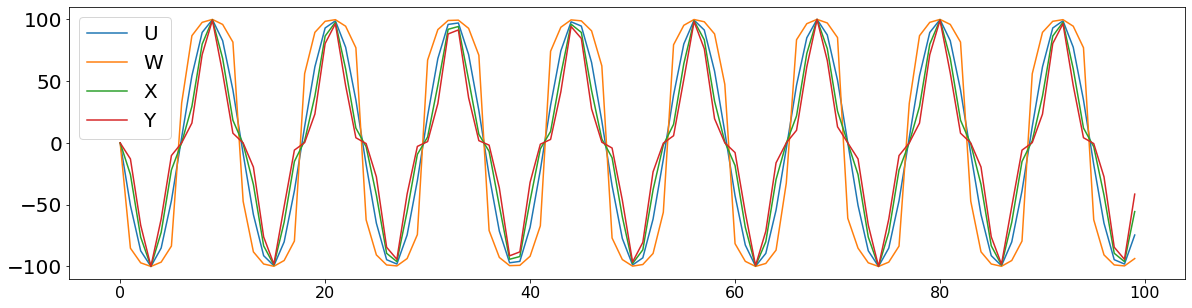

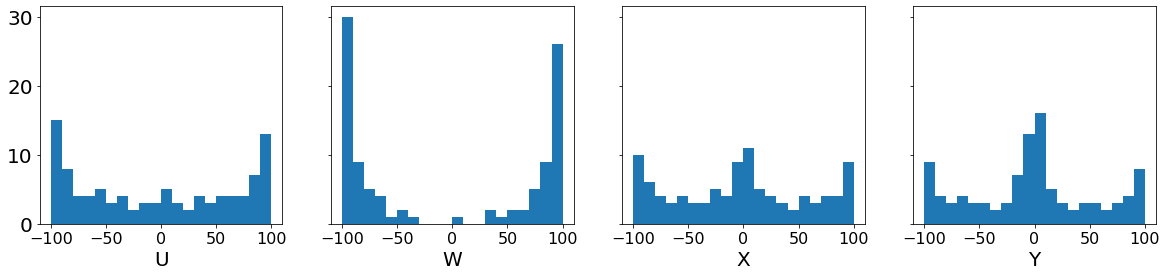

In [20]:
def logsign(v):
    return 0 if v == 0 else -math.log10(-v) if v < 0 else math.log10(v) 

def pow2sign(v):
    return 0 if v == 0 else -v*v if v < 0 else v*v 

def pow3sign(v):
    return v*v*v 

sin = [math.sin(x*100)*100 for x in range(0,100)]
sinlog = [logsign(math.sin(x*100)*100)*50 for x in range(0,100)]
sinpow2 = [pow2sign(math.sin(x*100))*100 for x in range(0,100)]
sinpow3 = [pow3sign(math.sin(x*100))*100 for x in range(0,100)]
df = pd.DataFrame({'U':sin,'W':sinlog,'X':sinpow2,'Y':sinpow3})
df.plot()

subplots_hist(df,df.columns,bins=20)

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,debug=False)
    print(c,k,e,si)

print()

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,count_centroids=False,debug=False)
    print(c,k,e,si)

print()
for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_optimal(df[c],Kmax=10,debug=False)
    print(c,k,e,si)


In [21]:
k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df['X'],Kmax=10,debug=True)
print(c,k,e,si)


1 1.0 0.0
2 1.2625596830633519 0.5668426306568201
3 1.0082823398185927 0.6533016770212215
4 1.161947853893267 0.595688461128371
5 1.254338724263138 0.5928719773206531
6 1.3798179289172197 0.5713926964577923
7 1.4968414081059873 0.564494815589184
8 1.5792872012093808 0.5768354185339145
9 1.7093128556867372 0.5820453716044222
10 1.922308833187123 0.5717458339776529
Y 1 None 0.0


### Evaluate with "Fleiss’ kappa" (FK) and "Krippendorff’s alpha" (KA) 
- https://en.wikipedia.org/wiki/Fleiss%27_kappa
- https://stackoverflow.com/questions/51919897/is-fleiss-kappa-a-reliable-measure-for-interannotator-agreement-the-following-r
- https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-016-0200-9
- https://www.statsmodels.org/dev/generated/statsmodels.stats.inter_rater.fleiss_kappa.html


In [22]:
from statsmodels.stats import inter_rater as irr
import krippendorff as kd

def most_frequent(List):
    return max(set(List), key = List.count)

machine_ratings = [
[1,3,2,2,1,1,3,3,1,2,2,3,1,3,3,1,3,2,1,1],
[1,3,2,2,1,1,2,3,1,2,2,3,1,2,2,1,2,2,3,3]]

# Source:
# https://docs.google.com/forms/d/e/1FAIpQLSeFQDd8Q33FgZvfR7NHFYrSpk4NElWSxRKAuzhQOrhM8D-FHQ/viewform

human_ratings = [
[1,1,2,2,4,4,2,3,1,2,2,3,1,2,2,1,3,2,3,3],
[4,4,4,2,3,2,3,3,1,2,2,3,1,4,4,1,3,2,3,3],
[2,1,2,2,1,1,2,3,1,2,2,3,1,2,2,1,2,2,3,3],
[1,1,2,2,1,1,2,3,1,2,2,3,1,2,2,1,2,2,3,3],
[1,1,2,2,1,1,2,3,1,2,2,3,1,1,1,1,2,2,3,3],
[1,1,2,2,1,1,2,3,1,2,2,3,1,2,2,1,2,2,3,3],
[1,1,2,2,1,1,2,3,1,2,2,3,1,2,1,1,2,2,3,3],
[4,4,4,2,4,4,3,3,1,2,2,3,2,2,2,2,3,2,3,3],
[3,4,2,2,1,1,2,3,1,2,2,3,1,2,2,1,3,2,3,3],
[1,1,2,2,1,1,2,3,1,1,2,3,1,1,1,1,1,2,1,1],
[1,1,2,2,3,1,2,3,1,2,2,3,1,1,1,1,1,2,1,3]]

machine_ratings_by_sample = np.transpose(machine_ratings)
human_ratings_by_sample = np.transpose(human_ratings)

all_human = [most_frequent(list(rs)) for rs in human_ratings_by_sample]
print(all_human)

machine_agg = irr.aggregate_raters(machine_ratings_by_sample) # returns a tuple (data, categories)
human_agg = irr.aggregate_raters(human_ratings_by_sample) # returns a tuple (data, categories)

machine_f_k = irr.fleiss_kappa(machine_agg[0], method='fleiss')
machine_k_a = kd.alpha(machine_ratings,level_of_measurement='nominal')

human_f_k = irr.fleiss_kappa(human_agg[0], method='fleiss')
human_k_a = kd.alpha(human_ratings,level_of_measurement='nominal')

print(machine_f_k,machine_k_a)
print(human_f_k,human_k_a) # 0.58 => 0.41 – 0.60	Moderate agreement / 0.61 – 0.80	Substantial agreement


[1, 1, 2, 2, 1, 1, 2, 3, 1, 2, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3]
0.5488721804511277 0.5601503759398496
0.588563208056105 0.5904333752922136


In [23]:
def kappa_alpha(ratings,digits=2):
    ratings_by_sample = np.transpose(ratings)
    agg = irr.aggregate_raters(ratings_by_sample) # returns a tuple (data, categories)
    f_k = irr.fleiss_kappa(agg[0], method='fleiss')
    k_a = kd.alpha(ratings,level_of_measurement='nominal')
    return(round(f_k,digits),round(k_a,digits))

print('machines',kappa_alpha(machine_ratings))
print('humans',kappa_alpha(human_ratings))
print('distance_humans',kappa_alpha([machine_ratings[0],all_human]))
print('silhouette_humans',kappa_alpha([machine_ratings[1],all_human]))

# 0.41 – 0.60	Moderate agreement
# 0.61 – 0.80	Substantial agreement
# 0.81 – 1.00	Almost perfect agreement


machines (0.55, 0.56)
humans (0.59, 0.59)
distance_humans (0.47, 0.48)
silhouette_humans (0.92, 0.92)


In [24]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.inter_rater.fleiss_kappa.html
# https://gist.github.com/skylander86/65c442356377367e27e79ef1fed4adee
# https://stackoverflow.com/questions/51919897/is-fleiss-kappa-a-reliable-measure-for-interannotator-agreement-the-following-r

k1_0 = [[4,0,0,0],
    [0,4,0,0],
    [0,0,4,0],
    [0,0,0,4]]
f_k = irr.fleiss_kappa(k1_0, method='fleiss')
print(f_k)

k1_0 = [[4,0,0,0],
    [0,4,0,0],
    [0,0,4,0],
    [1,1,1,1]]
f_k = irr.fleiss_kappa(k1_0, method='fleiss')
print(f_k)

k1_0 = [[4,0,0,0],
    [0,4,0,0],
    [1,1,1,1],
    [1,1,1,1]]
f_k = irr.fleiss_kappa(k1_0, method='fleiss')
print(f_k)

k1_0 = [[4,0,0,0],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]]
f_k = irr.fleiss_kappa(k1_0, method='fleiss')
print(f_k)

k1_0 = [[1,1,1,1],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]]
f_k = irr.fleiss_kappa(k1_0, method='fleiss')
print(f_k)



1.0
0.6444444444444445
0.2727272727272727
-0.06666666666666667
-0.3333333333333333


### Try alternative distributions 

exp 1 None 0.0
ln12 1 None 0.0
ln09 1 None 0.0
ln05 1 None 0.0

exp 10 0.0025115972108058263 0.5582089567446749
ln12 10 0.1336052261807789 0.5826578576588215
ln09 8 0.16201399005211786 0.5541350547065772
ln05 10 0.10583491944958828 0.5275074798482978

exp 2 None 0.6783226054405087
ln12 2 None 0.8243553302422574
ln09 2 None 0.7717235373336567
ln05 1 None 0.0


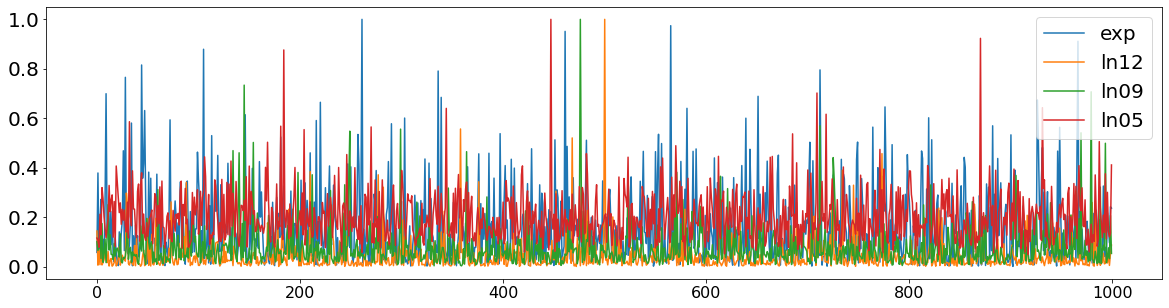

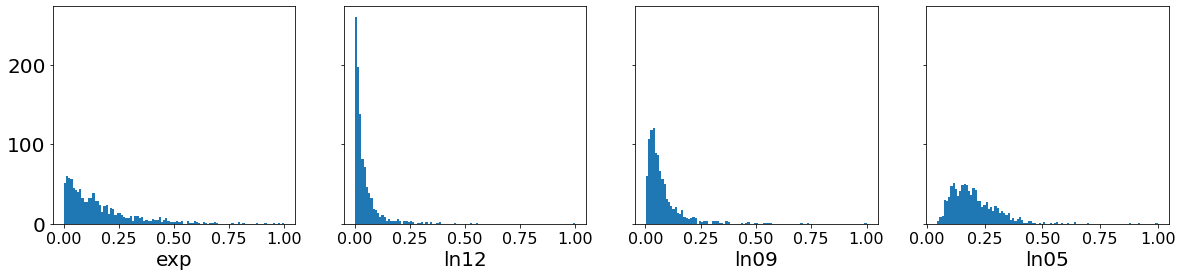

In [25]:
def norma(a):
    a = pd.Series(a) 
    return a / a.abs().max()

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html
exp = norma(np.random.exponential(scale=1,size=1000))
ln12 = norma(np.random.lognormal(mean=1, sigma=1.2, size=1000))
ln09 = norma(np.random.lognormal(mean=1, sigma=0.9, size=1000))
ln05 = norma(np.random.lognormal(mean=1, sigma=0.5, size=1000))
df = pd.DataFrame({'exp':exp,'ln12':ln12,'ln09':ln09,'ln05':ln05})

df.plot()

plt.rcParams["figure.figsize"] = (20,5);
subplots_hist(df,df.columns,bins=100)

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,debug=False)
    print(c,k,e,si)#,cs)

print()

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,count_centroids=False,debug=False)
    print(c,k,e,si)#,cs)

print()
for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_optimal(df[c],Kmax=10,debug=False)
    print(c,k,e,si)#,cs)
